# Data Output

> Output the texts and relevant metadata for use in other applications and projects.

In [ ]:
#| default_exp data_output

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import os

def save_talk_text(output_folder, talk):
    """
    Saves the text of a talk to a file within a folder representing its year and month.

    Args:
        output_folder (str): The root folder path where the year and month folders will be created.
        talk (GeneralConferenceTalk): The talk object containing the talk's text and metadata.

    Returns:
        dict: The updated talk's metadata with the added 'filename' key and its corresponding value.
    """
    year_folder = os.path.join(output_folder, 'y_' + str(talk.metadata['year']))
    if not os.path.exists(year_folder):
        os.makedirs(year_folder)

    month_folder = os.path.join(year_folder, 'm_' + str(talk.metadata['month']))
    if not os.path.exists(month_folder):
        os.makedirs(month_folder)

    filename = f"{talk.metadata.get('title', 'unknown_title').replace(' ', '_')}.txt"
    file_path = os.path.join(month_folder, filename)
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(talk.text)

    # Update metadata with the filename for reference
    talk.metadata['filename'] = filename
    return talk.metadata

In [ ]:
#| export
import csv

def save_metadata_to_csv(metadata_records, metadata_csv_path):
    """
    Saves metadata records to a CSV file.

    Args:
        metadata_records (list[dict]): A list of dictionaries containing metadata for each talk.
        metadata_csv_path (str): The path to the CSV file where the metadata will be saved.
    """
    with open(metadata_csv_path, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['title', 'author', 'calling', 'month', 'year', 'url', 'filename']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for record in metadata_records:
            writer.writerow(record)

In [ ]:
#| export
from general_conference_extractor.GeneralConferenceTalk import GeneralConferenceTalk

def extract_conference_talks(urls, output_folder, metadata_csv_path):
    """
    Extracts conference talks from URLs, saves their text to files, and saves metadata to a CSV file.

    Args:
        urls (list[str]): A list of URLs for conference talks.
        output_folder (str): The folder path where the talk's text files will be saved.
        metadata_csv_path (str): The path to the CSV file where the talk's metadata will be saved.
    """
    metadata_records = []
    for url in urls:
        talk = GeneralConferenceTalk(url, title=True, author=True, calling=True)
        talk_metadata = save_talk_text(output_folder, talk)
        metadata_records.append(talk_metadata)
    
    save_metadata_to_csv(metadata_records, metadata_csv_path)

In [ ]:
# As an example
urls = ['https://www.churchofjesuschrist.org//study/general-conference/2016/04/he-asks-us-to-be-his-hands?lang=eng', "https://www.churchofjesuschrist.org/study/general-conference/2024/04/13holland?lang=eng"]
output_folder = './conference_talks'
metadata_csv_path = './metadata.csv'

# to produce the respective folders and documents
# extract_conference_talks(urls, output_folder, metadata_csv_path)

#### txt Document

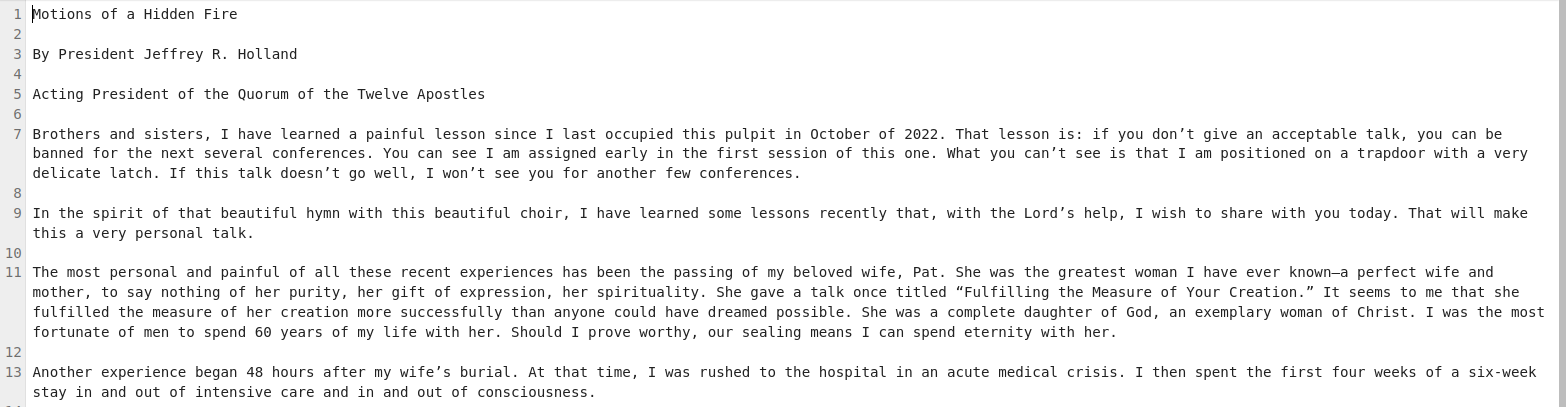

In [ ]:
from IPython.display import display, Image
display(Image(filename='./gen_conf_extract_doc_txt.png'))

#### Metadata

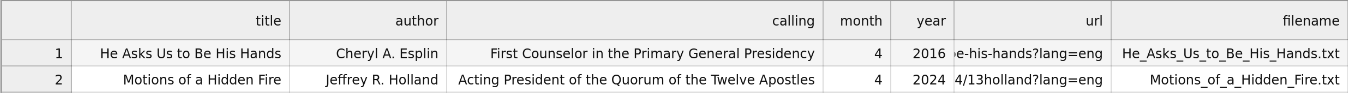

In [ ]:
display(Image(filename='./gen_conf_extract_metadata.png'))